In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
dir = '../logs/ppo'
file = 'logs.csv'
experiments = [
    'l1_MiniGrid-MultiRoom-N4-Random-v0',
    'l1_MiniGrid-ObstructedMaze-1Dl-v0',
    'l1_MiniGrid-ObstructedMaze-1Dlh-v0',
    'uniform_MiniGrid-MultiRoom-N4-Random-v0',
    'uniform_MiniGrid-ObstructedMaze-1Dl-v0',
    'uniform_MiniGrid-ObstructedMaze-1Dlh-v0_debug'
]
field = 'test:mean_episode_return'

In [13]:
results = {exp: pd.read_csv(f'{dir}/{exp}/{file}') for exp in experiments}

In [36]:
def plot_exp(word, results, field=field):
    fig, ax = plt.subplots()
    legend = []
    for exp, res in results.items():
        if word in exp:
            res[field].plot()
            legend.append(exp.split('_')[0])
    ax.legend(legend)

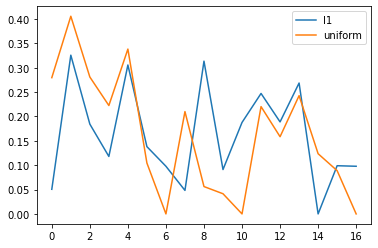

In [37]:
plot_exp('MultiRoom', results)

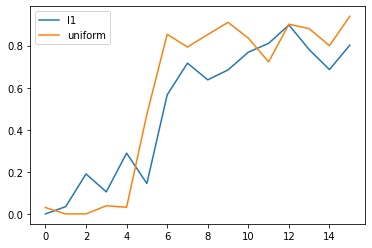

In [38]:
plot_exp('ObstructedMaze-1Dl-', results)

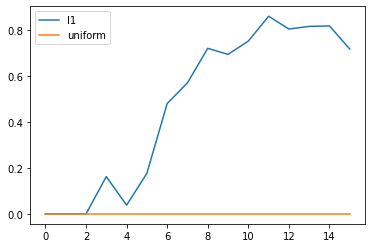

In [39]:
plot_exp('ObstructedMaze-1Dlh', results)